# Biol 359A  | Descriptive statistics and comparing groups
### Spring 2022, Week 2
<hr>

Objectives:
-  Run and interpret a t-test
-  Gain intuition about statistical tests and sample sizes
-  Read basic python syntax



A couple of bash commands to make google colab work:

In [ ]:
!git clone https://github.com/BIOL359A-FoundationsOfQBio-Spr22/week2_statisticaltests
!mkdir ./data
!cp week2_statisticaltests/data/* ./data
!cp week2_statisticaltests/clean_data.py ./

### Import statements

Import statements are used to integrate *external code or packages* into our analysis. 

- `pandas`: Represents data as tables
- `seaborn`: Data exploration visualization tool
- `ipywidgets`: Notebook widgets that add user interfaces to notebooks
- `random`: Generate random numbers
- `numpy`: General math/matrices package
- `matplotlib`: Data visualization software
- `Scipy`: General scientific computing

Using `as` will alias (rename) the package in the code.
`matplotlib.pyplot` is importing the submodule `pyplot` from `matplotlib`. 
`from scipy.stats` is telling python where to find `ttest_ind`. 

In [ ]:
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as ttest

TITLE_FONT = 20
LABEL_FONT = 16
TICK_FONT = 16
FIG_SIZE = (12,12)
COLORS= ["#008080","#CA562C"]

sns.set_context("notebook")
sns.set_style("whitegrid")
sns.set(font_scale=1) #Change from 1 to 1.5 or 2 if you have a hard time reading text

### Precursor: Common data visualizations

This first section is just to familiarize you with common data visualizations for distributions and continuous variables. 
It will also introduce you to many of the interactive buttons that you'll see throughout the notebook.
First we are going to create a toy dataset using a random number generator. 
Here we use the Normal distribution function (pdf):


$$
  f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} 
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)
$$

Another way that this statement is equivalently written is: 

$$ X \sim \mathcal{N}(\mu, \sigma^2) $$

Or that X comes from a normal distribution with a mean (expected value) of $\mu$ and a variance of $\sigma^2$. We use this shorthand as those are the only unknown constants in the equation!

In [ ]:
def generate_normal_distribution(n = 100, mu = 6, sigma = 2):
    return [random.gauss(mu, sigma) for _ in range(0,n)]

In [ ]:
def plot_a_histogram(x, n, mu, sigma):
    """Generate annotated histogram based on normal (gaussian) distribution"""
    data_color = COLORS[0]
    annotation_color= COLORS[1]
    plt.figure(figsize=FIG_SIZE)
    sns.histplot(x, color=data_color, kde=True, stat="probability")
    _, xmax, _, ymax = plt.axis()
    plt.title("Histogram of random values generated from a normal distribution", fontsize=TITLE_FONT)
    
    plt.axvline(mu, linestyle='--', color=annotation_color, lw=3)
    plt.text(mu, .97*ymax, r' $\mu$', color=annotation_color, fontsize=LABEL_FONT, ma="left")
    
    plt.axvline(mu+sigma, linestyle=':',color=annotation_color, lw=3)
    plt.text(mu+sigma, .97*ymax, r' $\mu+\sigma$', color=annotation_color, fontsize=LABEL_FONT, ma="left")

    plt.axvline(mu-sigma, linestyle=':',color=annotation_color, lw=3)
    plt.text(mu-sigma, .97*ymax, r' $\mu-\sigma$', color=annotation_color, fontsize=LABEL_FONT, ma="right")
    
    plt.text(.8*xmax, .9*ymax, 'Data', color=data_color, fontsize=LABEL_FONT, weight="bold")
    plt.text(.8*xmax, .93*ymax, 'Underlying distribution', color=annotation_color, fontsize=LABEL_FONT, weight="bold")
    
    sns.despine()

    plt.show()
 
@widgets.interact_manual(n=(3,1000), mu=(-10, 10), sigma=(0,10))
def create_histplot(n=100, mu=6, sigma=2): 
    """Wrapper function for widgets decorator and plot_a_histogram()"""
    toy_dataset_x = generate_normal_distribution(n=n, mu=mu, sigma=sigma)
    plot_a_histogram(toy_dataset_x, n, mu, sigma)

__Histograms__ use discrete bins (range of values) to categorize data, and are used primarily to visualize probability or proportions. Most visualizations of probability are based on histogram-like structures, and the kernel density estimate (KDE) line is the best guess at an underlying distribution. The higher the bar in a bin, the more times a value occurs in that bin within a dataset.

In [ ]:
def plot_a_boxplot(x, n, mu, sigma, swarm):
    """Generate annotated boxplot based on normal (gaussian) distribution"""
    data_color = COLORS[0]
    annotation_color= COLORS[1]
    plt.figure(figsize=(10,5))
    sns.boxplot(data=x, color=data_color,orient='h', boxprops=dict(alpha=.5), showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"6"})
    if swarm: sns.stripplot(data=x, orient='h',size=5, color=".3", linewidth=0)
    
    _, xmax, _, ymax = plt.axis()
    plt.title("Boxplot of random values generated from a normal distribution", fontsize=TITLE_FONT)
    
    plt.axvline(mu, linestyle='--', color=annotation_color, lw=3)
    plt.text(mu, -0.9*ymax, r' $\mu$', color=annotation_color, fontsize=LABEL_FONT, ma="left")
    
    plt.axvline(mu+sigma, linestyle=':',color=annotation_color, lw=3)
    plt.text(mu+sigma, -0.9*ymax, r' $\mu+\sigma$', color=annotation_color, fontsize=LABEL_FONT, ma="left")

    plt.axvline(mu-sigma, linestyle=':',color=annotation_color, lw=3)
    plt.text(mu-sigma, -0.9*ymax, r' $\mu-\sigma$', color=annotation_color, fontsize=LABEL_FONT, ma="right")
    
    plt.text(0.75*xmax, 0.6*ymax, 'Data', color=data_color, fontsize=LABEL_FONT, weight="bold")
    plt.text(0.75*xmax, 0.8*ymax, 'Underlying distribution', color=annotation_color, fontsize=LABEL_FONT, weight="bold")
    sns.despine()
    plt.show()    
    
    
@widgets.interact_manual(n=(3,1000), mu=(-10, 10), sigma=(0,10))
def create_boxplot(n=100, mu=6, sigma=2, show_individual_points=False): 
    """Wrapper function for widgets decorator and plot_a_boxplot()"""
    toy_dataset_x = generate_normal_distribution(n=n, mu=mu, sigma=sigma)
    plot_a_boxplot(toy_dataset_x, n, mu, sigma, swarm=show_individual_points)

__Box plots__ are common for comparing data, which we will be using later. The _box_ represents the interquartile range, or the data that contains the middle 50 percent of the data. The _whiskers_ represent the range of the distribution, adjusted for outliers, represented by _diamonds_. The _circle_ represents the sample mean.

In [ ]:
def plot_a_scatterplot(x, y, n, mu_x, sigma_x, mu_y, sigma_y):
    """Generate annotated boxplot based on normal (gaussian) distribution"""
    data_color = COLORS[0]
    annotation_color= COLORS[1]
    sns.jointplot(x=x, 
                  y=y,
                  kind="reg",color=data_color,
                  marginal_kws=dict(bins=10,color=annotation_color));
    plt.xlabel(r"X data $\mu={0}$,$\sigma={1}$".format(mu_x,sigma_x))
    plt.ylabel(r"Y data $\mu={0}$,$\sigma={1}$".format(mu_y,sigma_y))

    sns.despine()
    plt.show()  
    
@widgets.interact_manual(n=(3,1000), mu_x=(-10, 10), sigma_x=(0,10), mu_y=(-10, 10), sigma_y=(0,10))
def create_scatterplot(n=100, mu_x=6, sigma_x=2, mu_y=6, sigma_y=2): 
    """Wrapper function for widgets decorator and plot_a_scatterplot()"""
    toy_dataset_x = generate_normal_distribution(n=n, mu=mu_x, sigma=sigma_x)
    toy_dataset_y = generate_normal_distribution(n=n, mu=mu_y, sigma=sigma_y)
    plot_a_scatterplot(toy_dataset_x, toy_dataset_y, n, mu_x, sigma_x, mu_y, sigma_y)

__Scatter plots__ are designed to show *pairs* of data points. Each X-axis data point is associated with a Y-axis data point. These plots will be common when we're talking about associations between continuous variables, specifically for discussions of correlation (and regression - you can ignore the line through the points for now). The histograms have been included to help associate the data sets to the scatter points. Remember, these data were randomly generated and paired.

# Hypothesis testing and the null distribution:

One of the goals of this classwork is to reinforce the relationship between the null hypothesis, null distribution, p-values, and hypothesis tests. To review, the standard procedure of a hypothesis test is as follows:

1) define your __Null Hypothesis__, or what you'd believe based on no evidence. This hypothesis is usually the "lack of an effect" which can look like $\mathcal{H}_0: \bar{X} = \mu$. Your __alternative hypothesis__ is usually "everything except the null hypothesis", which looks like $\mathcal{H}_1: \bar{X} \neq \mu$. Other common alternatives are $\mathcal{H}_A: \bar{X} > \mu$ or $\mathcal{H}_1: \bar{X} < \mu$. Which one you choose effects what your __critical values__ are. 

2) Based on the null hypothesis, you are looking for a __Test Statistic__, a random variable that captures your null hypothesis. For a null hypothesis of $\mathcal{H}_0: \bar{X} = \mu$, the common test statistic that assumes an unknown variance is _t_ where $s_x$ is the sample variance:

$$ t = \frac{\bar{X} - \mu}{s_x/\sqrt{n}} $$

3) The distribution of your test statistic is called your __Null Distribution__. The distribution of the _t_ statistic  is the _t_-distribution, which we will look at a little bit more throughout this classwork. Notice that assuming the null hypothesis is true ($\bar{X} = \mu$) means that _t_ is equal to 0, and the mean of the _t_-distribution is 0. 

4) The purpose of the test is to determine how likely/unlikely it is to observe your sample in context of the assumptions stated above. In order to do so, we will find $\bar{X}$ on the null distribution. The probability of $\bar{X}$ occuring is the ___p_-value__. Whether or not you label something as significant is by comparing it to your __significance level__, $\alpha$.

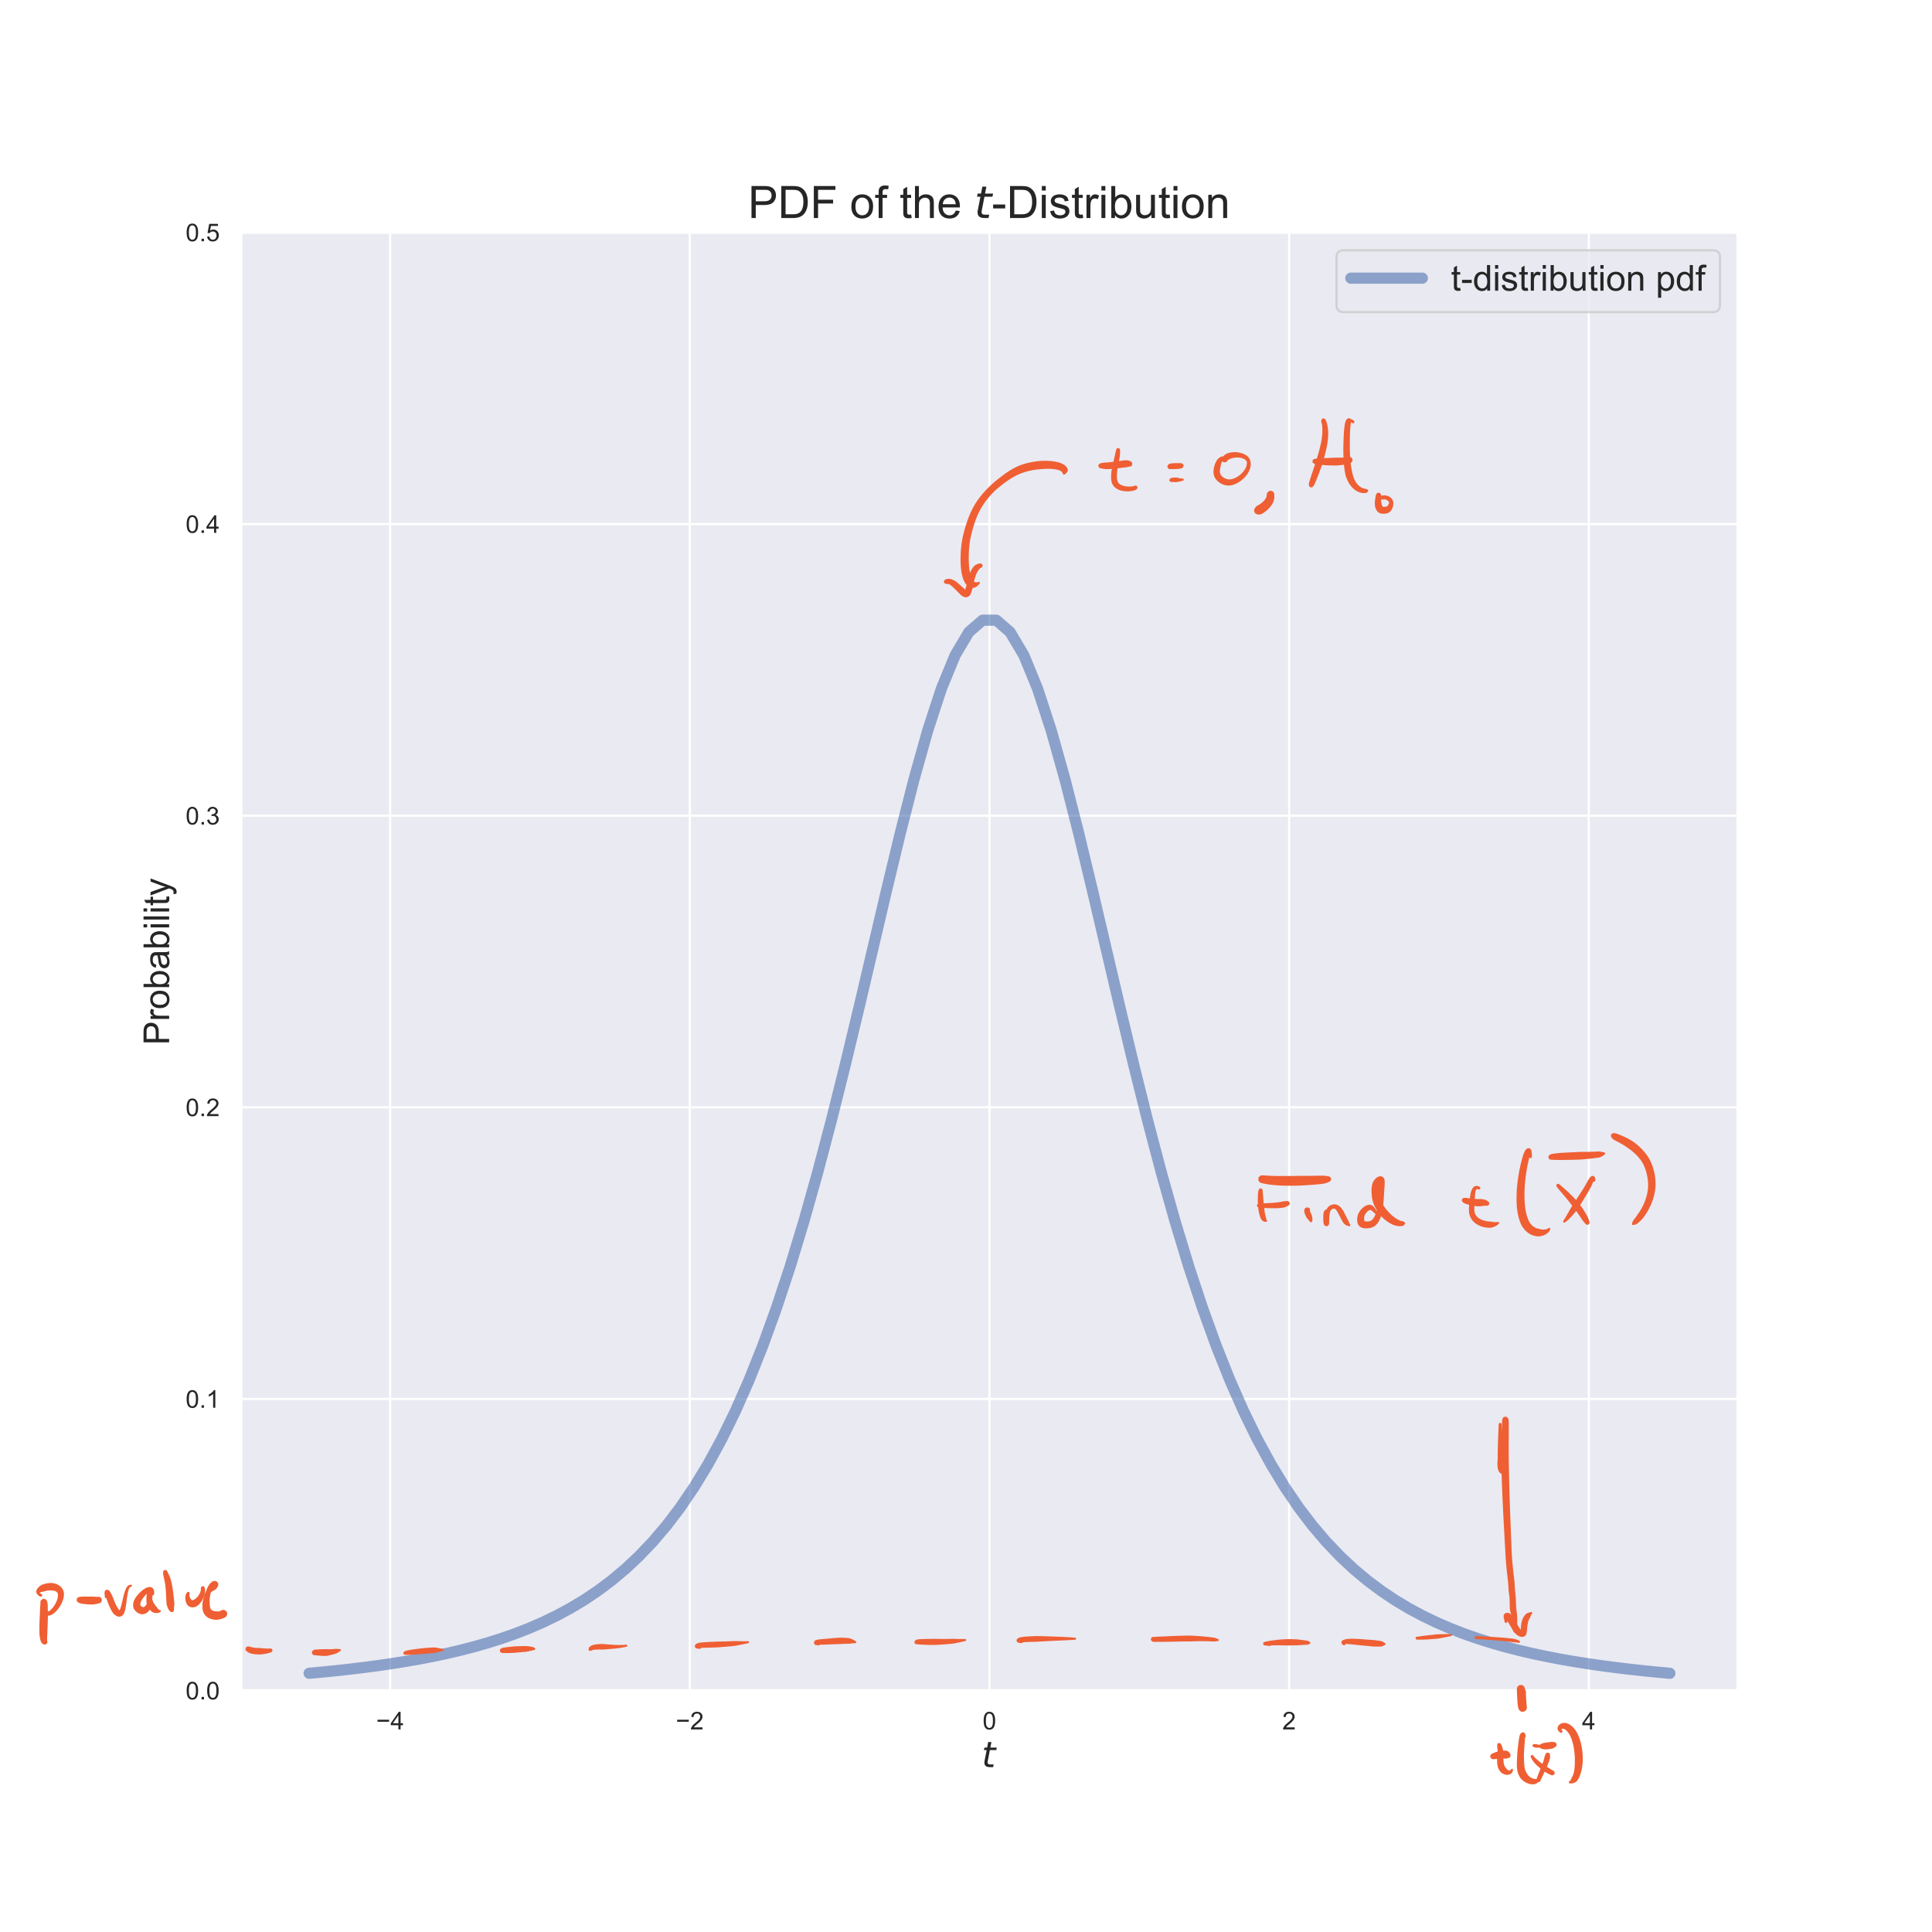



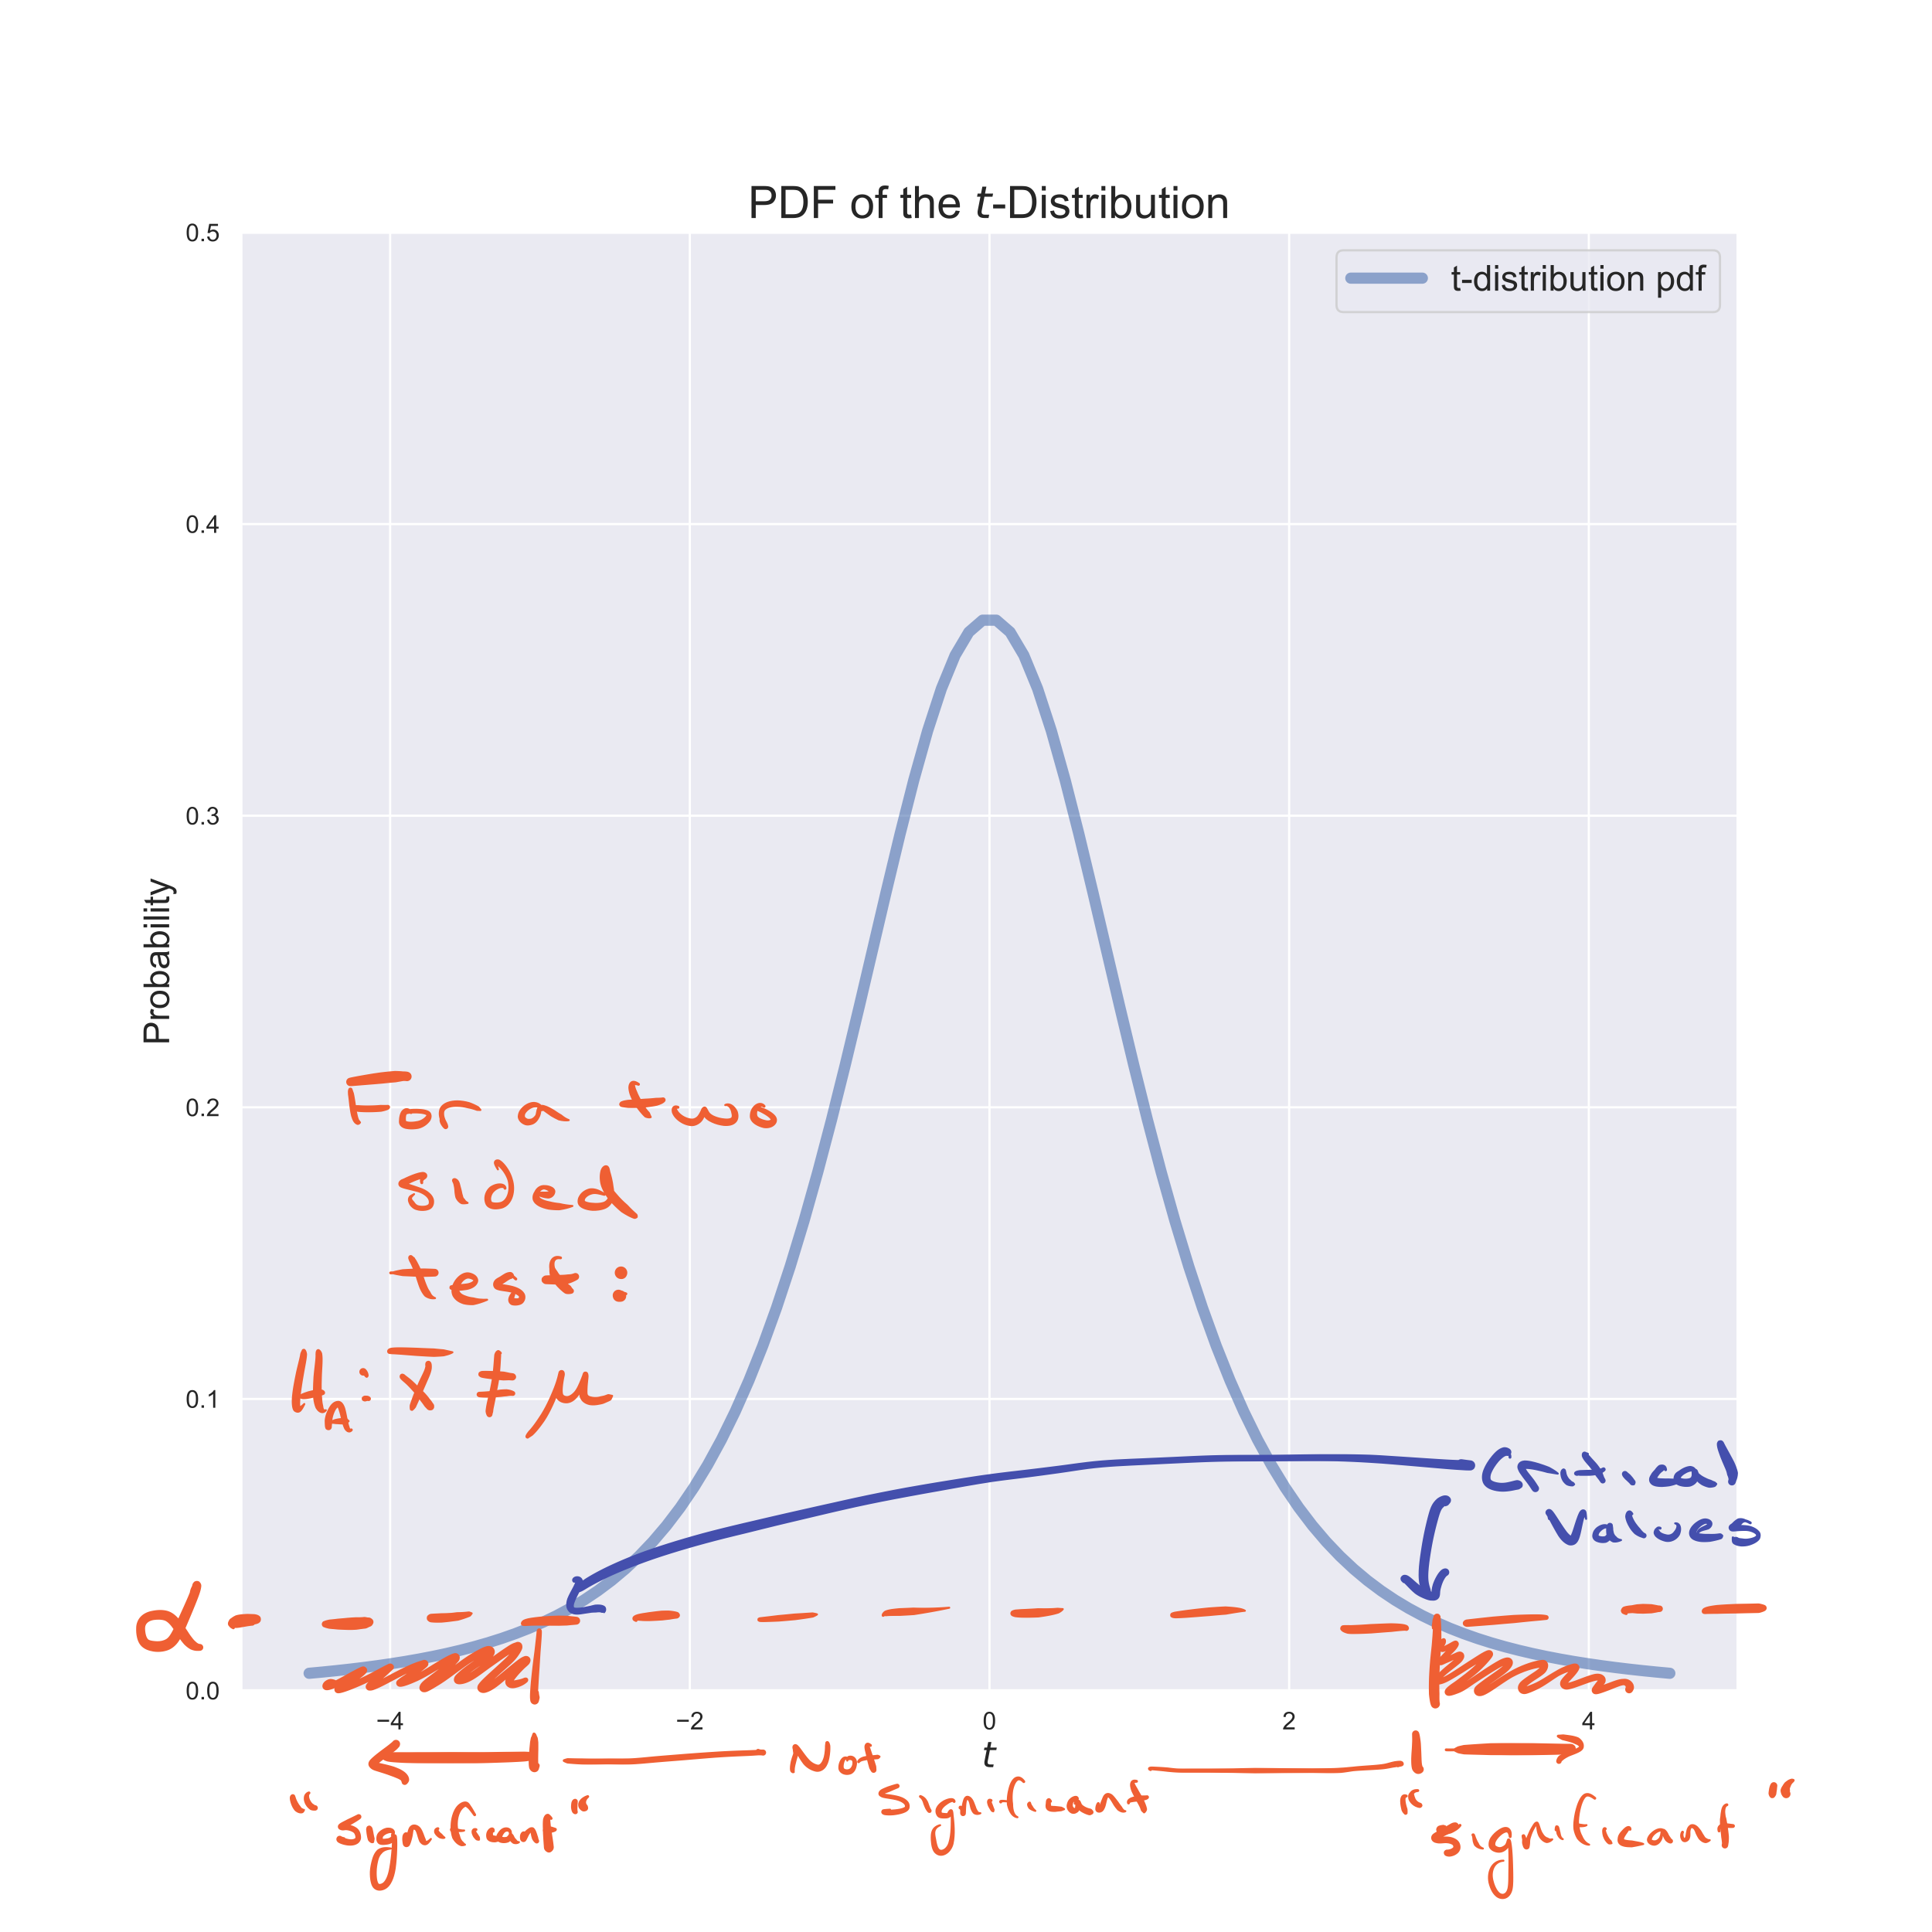

# Classwork starts here:

# Question 1: Introduce yourself to your group!


You can ignore the code below! It is setting up an experiment.

In [ ]:
def get_random_datasets(n, rng, repetitions=200):
    """Generate (repititions) of sample averages, based on (n) samples per average"""
    averages = []
    all_nums = []
    for i in range(0, repetitions):
        nums = [generate_random_numbers(rng) for _ in range(0,n)]
        all_nums += nums
        averages.append(np.mean(nums))
    return all_nums, averages
    
def generate_histograms_clt(axs, n=10, rng="uniform"):
    """build 2x2 matrix of histograms"""

    all_nums_fixed, averages_fixed = get_random_datasets(10, rng)
    build_paired_histograms(averages_fixed, all_nums_fixed, 10, rng, axs, column=0)
    
    all_nums, averages = get_random_datasets(n, rng)
    build_paired_histograms(averages, all_nums, n, rng, axs, column=1)
    
def build_paired_histograms(averages, all_nums, n, rng, axs, column):
    """histogram plotting specific to this lecture"""
    colors=["#1e81b0", "#e28743"]
    color = colors[column]
    axs[0,column].set_title(f"random samples")
    axs[1,column].set_title(f"sample averages")
    axs[0,column].text(0.9, 0.9, f"n:{n}"+r" $\mu$: {0:.2f}, $\sigma$:{1:.2f}".format(np.mean(all_nums), np.std(all_nums)) ,
                       verticalalignment='bottom', horizontalalignment='right',
                       transform=axs[0,column].transAxes,
                       color=color, fontsize=LABEL_FONT)
    axs[1,column].text(0.9, 0.9, f"n:{n}"+r" $\hat{{\mu}}_\bar{{X}}$: {0:.2f}, $\hat{{\sigma}}_\bar{{X}}$:{1:.2f}".format(np.mean(averages), np.std(averages)),
                       verticalalignment='bottom', horizontalalignment='right',
                       transform=axs[1,column].transAxes,
                       color=color, fontsize=LABEL_FONT)
    sns.histplot(all_nums, ax=axs[0, column], color = color, stat="probability", kde=True)
    sns.histplot(averages, bins=10, ax=axs[1, column], color = color, stat="probability", kde=True)
    axs[1, column].set_xlim(0,10)
    
    
def generate_random_numbers(generator = "uniform"):
    """generate random numbers with a mean of 5"""
    if generator == "uniform": return random.uniform(0,10)
    elif generator == "exponential": return random.expovariate(1/5)
    elif generator == "normal": return random.gauss(5,2)
    
def format_plots(axs):
    """some extra formatting for subplots"""
    for ax in axs.flat:
        title = ax.get_title()
        ax.set_title(title, fontweight="bold", size=LABEL_FONT)
        ax.set_ylabel('Proportion (Probability)', fontsize = LABEL_FONT)
        ax.set_xlabel('Number', fontsize = LABEL_FONT)
        ax.tick_params(labelsize=TICK_FONT)
        

# Question 2: The central limit theorem 


There are a number of different ways that the CLT can be proven, but the CLT states the following:

$$\bar{X} \xrightarrow[]{d} \mathcal{N}\Big(\mu, \frac{\sigma^2}{n}\Big)$$

This means that with repeated sampling, $\bar{X}$ will converge to a normal distribution, centered at $\mu$ or the mean of the original distribution, with a standard deviation of $\sigma/\sqrt{n}$ (variance of $\sigma^2/n$) or the standard deviation of our original distribution divided by the number of samples included in the average. We will show by using the following procedure:

Here we a couple of plots for you to interact with. The left-side plots are fixed to collecting 10 samples from the distribution. The top row of plots shows the histograms of the underlying data points (here n samples x 200 repititions) and the bottom row shows the distribution of averages (200 repititions). Things to think about: Are the results what you would expect from the central limit theorem (CLT)? Does it hold true for other distributions? Is there a distribution shown here that the CLT does not hold true for? 




In [ ]:
@widgets.interact_manual(n=(3,100),  generator=["uniform","exponential","normal"])
def demonstrate_clt(n=10, generator="exponential"):
    """wrapper function for CLT and widgets decorator"""
    random.seed(10)
    fig, axs = plt.subplots(2, 2, figsize=FIG_SIZE, constrained_layout=True)
    fig.suptitle(f"Random number generator (distribution): {generator}",fontweight="bold", size=TITLE_FONT)
    generate_histograms_clt(axs, n, generator)
    format_plots(axs)

# Context: Understanding our data

We are going to import a dataset using another python script. The python script is loading the file and doing some basic cleaning of parts of the dataset we aren't using. It can be found in `clean_data.py`.

In [ ]:
import clean_data #helper function with 

cancer_dataset = clean_data.generate_clean_dataframe()
cancer_dataset

### We have a basic understanding of the structure of the data now. 

From the data source: Wisconsin Diagnostic Breast Cancer (WDBC)

```
	Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using
	Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], a classification method which uses linear
	programming to construct a decision tree.  Relevant features
	were selected using an exhaustive search in the space of 1-4
	features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane
	in the 3-dimensional space is that described in:
	[K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34].
    
    Source:
    W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
```

What do all the column names mean?

- ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)


Cateogory Distribution: 357 benign, 212 malignant

If we wanted to show the first five values in the table:

In [ ]:
cancer_dataset["mean_area"].head(5)

If we wanted to show the first five values from the groups in the diagnosis column:

In [ ]:
cancer_dataset["mean_area"].groupby("diagnosis").head(5)

If we wanted to calculate basic descriptive statistics:

In [ ]:
def calculate_count(x):
    """calculate how many values are in a dataset"""
    return len(x)

def calculate_mean(x):
    """get the sample mean"""
    return np.sum(x) / len(x)

def calculate_variance(x):
    """calculate variance of the dataset"""
    return calculate_mean((x - calculate_mean(x))**2)

def calculate_std(x):
    """calculate standard deviation from the square of the variance"""
    return np.sqrt(np.sum((x - calculate_mean(x))**2)/(len(x)-1))

area = cancer_dataset["mean_area"]

print(f"count =  {calculate_count(area):.0f}")
print(f"mean =  {calculate_mean(area):.2f}")
print(f"var =  {calculate_variance(area):.2f}")
print(f"std =  {calculate_std(area):.2f}")


`pandas` has us covered:

In [ ]:
cancer_dataset["mean_area"].describe()

# Question 3: Comparing variables

What if we're interested in the relationship between variables? Here we calculate the Pearson correlation coefficient $\rho$. Which variables appear correlated? Which don't appear correlated? Is there a variable that appears correlated but likely not informative? 

In [ ]:
# Create scatter plots of the various features
def calculate_correlation(x,y):
    """calculate pearson correlation"""
    return calculate_mean((x - calculate_mean(x)).transpose() * (y - calculate_mean(y))) / np.sqrt(calculate_variance(x) * calculate_variance(y))
    
@widgets.interact(x=list(cancer_dataset), y=list(cancer_dataset))    
def make_scatterplot(x="mean_radius",y="mean_area"):
    """make scatterplot with correlation value and regplot"""
    colors=["#e28743", "#1e81b0"]

    corr = calculate_correlation(cancer_dataset[x], cancer_dataset[y])
    index = int(corr > 0.5)
    color = colors[index]
    plt.title(r"correlation: $\rho = ${:.3f}".format(corr), color= color, size=TITLE_FONT)
    sns.scatterplot(data=cancer_dataset, x=x, y=y, alpha=0.5, color=color);


# Question 4: Formulating hypotheses

### Let's split the variables up by their category (also called it's label in data science).

Based on our available data, we're not that interested in what the descriptive statistics are on the individual columns. We are interested in the differences between those groups, specifically the benign and malignant tumors.

In [ ]:
def compare_diagnoses_by_variable(variable: str, dataframe: pd.DataFrame = cancer_dataset):
    """Accepts column name to generate basic descriptions"""
    df = dataframe.reset_index()
    sns.boxplot(data=df, x=variable, y=df["diagnosis"])
    return dataframe[variable].groupby("diagnosis").describe()

@widgets.interact(variable=list(cancer_dataset))
def comparison_wrapper(variable="mean_radius"):
    return compare_diagnoses_by_variable(variable)

### Let's run a two-sample t-test on these categories

We didn't focus on any specific t-tests, but there are a couple different variations. 
Often they are introduced for comparing a sample to an assumed value, here $\mu$. 
 
$$ t = \frac{\bar{X} - \mu}{s_x/\sqrt{n}} $$

for the corresponding null hypothesis: $\mathcal{H}_0: \bar{X} = \mu$

We often don't know that quantity, but we can compare it to another sample mean. 
The previous test statistic then becomes

$$ t = \frac{\bar{X}_1 - \bar{X}_2}{S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} $$

Where, 

$$ S_p = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2} $$

for the corresponding null hypothesis: $\mathcal{H}_0: \bar{X}_1 = \bar{X}_2$

Don't worry we aren't going to ask you to derive, memorize, nor calculate this by hand (even though you can). 




In [ ]:
def run_ind_ttest(feature="mean_radius", dataset = cancer_dataset, welch=False):
    """
    run two sample t-tests
    For the motivated, visit 
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html 
    to see the documentation to see how to write the code for a t-test."""
    cat1 = dataset.xs("M", level=1)
    cat2 = dataset.xs("B", level=1)
    df = dataset.reset_index()
    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True)

    sns.boxplot(data=df, x=feature, y=df["diagnosis"], ax=ax_box)
    sns.histplot(data=df, x=feature, hue=df["diagnosis"], ax=ax_hist, stat="probability", kde=True)
    if welch: tstat, pvalue = ttest(cat1[feature], cat2[feature], equal_var=False)
    else: tstat, pvalue = ttest(cat1[feature], cat2[feature])
    print(f"p-value: {pvalue:.2e}")
    



Let's use all the data points we have and compare malignant and benign tumors. Choose a variable and predict an outcome, you can then run a t-test to compare the means of the two groups. However, consider if the assumptions for a t-test are accurate (namely, do the variances come from the same sampling population).

In [ ]:
@widgets.interact(variable=list(cancer_dataset))
def run_ttest(variable):
    run_ind_ttest(feature=variable)



This test requires us to assume that the variances from the two samples share a population variance. Practically, if your standard deviations between samples is small (think less than a ratio of 3, but you can be more rigorous with an F-test), you should be okay. In practice, this means that a typical t-test is inappropriate for comparing from two different populations, but a Welch t-test with a slightly different test statistic (that is still from a t-distribution) is used: https://en.wikipedia.org/wiki/Welch%27s_t-test

Were there variables that you are uncomfortable making that assumption, based on the variance in the data? We can use a Welch's test that can account for that variability.

In [ ]:
@widgets.interact(variable=list(cancer_dataset))
def run_welch_test(variable):
    run_ind_ttest(feature=variable, welch=True)

# Question 5: Sample size and _p_-hacking

So we've compared the data based on all of the available data, but what if we were limited in the samples that we were able to collect? We will consider what happens to our comparisons and tests if we are only able to see a subsample of the available data. There are multiple things to consider here but there are two main ideas that drive the concept of _p_-hacking. 

  1) Intuitively, more samples give you more information about your population. 
  
  2) More samples also reduce your p-values, potentially assigning "signicance" to a potentially trivial effect.

__Aside__: This process is similar to sampling from the empirical distribution function and is important for concepts like bootstrapping that you may encounter in further readings. 

In [ ]:

@widgets.interact_manual(feature=list(cancer_dataset), n=(3,100))
def run_sampled_ttest(feature="mean_radius", n=3):
    """randomly sampled students t-test with same n"""
    seed = 1
    cat1 = cancer_dataset.xs("M", level=1).sample(n, random_state=seed)
    cat2 = cancer_dataset.xs("B", level=1).sample(n)
    
    cat1["diagnosis"] = "M"
    cat2["diagnosis"] = "B"
    df = pd.concat([cat1,cat2]).reset_index()
    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True)

    sns.boxplot(data=df, x=feature, y=df["diagnosis"], ax=ax_box)
    sns.histplot(data=df, x=feature, hue=df["diagnosis"], ax=ax_hist, stat="probability", kde=True)    
    tstat, pvalue = ttest(cat1[feature], cat2[feature])
    print(f"p-value: {pvalue:.2e}")

Again, if we are under the impression that the data does not share the population variance, we can use the Welch t-test.

In [ ]:
@widgets.interact_manual(feature=list(cancer_dataset), n=(3,100))
def run_sampled_welch_ttest(feature="mean_radius", n=3):
    """randomly sampled welch t-test with same n"""
    seed = 1
    cat1 = cancer_dataset.xs("M", level=1).sample(n, random_state=seed)
    cat2 = cancer_dataset.xs("B", level=1).sample(n)
    
    cat1["diagnosis"] = "M"
    cat2["diagnosis"] = "B"
    df = pd.concat([cat1,cat2]).reset_index()
    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True)

    sns.boxplot(data=df, x=feature, y=df["diagnosis"], ax=ax_box)
    sns.histplot(data=df, x=feature, hue=df["diagnosis"], ax=ax_hist, stat="probability", kde=True)    
    tstat, pvalue = ttest(cat1[feature], cat2[feature], equal_var=False)
    print(f"p-value: {pvalue:.2e}")

# Question 6: Robustness of the _t_-test

### Comparing the pdf of the _t_ distribution and the normal distribution

The t-test is a largely robust method of comparing the mean to a value or the mean of another group. The method is generally robust for skewed distributions. Here we are going to compare the t-distribution to the normal distribution. Keeping in mind the CLT, what can we say about the point of diminishing returns with the $t$-distribution? Is there a cutoff point for degrees of freedom? (There is no simple answer here.)

In [ ]:
from scipy.stats import t, norm

@widgets.interact_manual(df=(3,100))
def t_vs_norm(df=3):
    """plot the t-distribution vs the normal distribution pdfs"""
    x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
    fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
    ax.plot(x, t.pdf(x,df),'-', lw=5, alpha=0.6, label='t-distribution pdf')
    ax.plot(x, norm.pdf(x),'k:', lw=5, alpha=0.6, label='normal distribution pdf')
    plt.ylabel("Probability", fontsize=LABEL_FONT)
    plt.legend(loc="best",fontsize=LABEL_FONT)
    plt.xlabel("X", fontsize=LABEL_FONT)
    plt.title(r"Student's $t$-Distribution vs. Normal Distribution", fontsize=TITLE_FONT)
    plt.ylim(0,.5)
    plt.show()



### Optional: Relationship between the _t_-distribution and the CLT 

If you are still confused what the origin of the _t_-distribution is, we will cover that here. 
This information will not be on an evaluation, but can provide you further intuition about how to think about $t$-tests. 

We are going to start from the CLT. 
We know that the sample means of a population are normally distributed, and therefore if we design our test-statistic with that in mind, we can some of the nice properties of the normal distribution. 
Although we simplified the CLT equation, it is more common to see it written as: 


$$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \xrightarrow[]{d} N(0, 1)$$

Meaning that the left hand side of the equation will converge on the standard normal, or the normal distribution with a mean of 0 and a standard deviation of 1. 

Does the left hand side look familiar? Compare it to the original t-test statistic. 

$$ t = \frac{\bar{X} - \mu}{s_x/\sqrt{n}} $$

Because we generally don't know the $\sigma$ of the underlying distribution (in general: we are trying to understand the population from a sample, not understand a sample from a population), we need to estimate $\sigma$ with the sample standard deviation, $s_x$. 
Similarly to the CLT, we know that the the sample deviation has a chi-squared distribution, $\chi^2$. 
This fact leads to the t statistic being the normal distribution, divided by the chi-squared distribution, yielding the $t$-distribution.